# Problem Statement and Basic Metric Analysis

**Problem Statement-** The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
1. **Demographic Analysis -**
- Age: Analyze the age distribution of customers purchasing each type of treadmill.
- Gender: Examine the gender distribution among customers for each treadmill type.
- Income level: Look at the income levels of customers buying different types of treadmills.
- Location: Determine if there are geographical differences in the customer base for each treadmill type.

2. **Psychographic Analysis -**
- Lifestyle: Explore the lifestyle preferences of customers associated with each treadmill type.
- Fitness goals: Determine if there are variations in fitness objectives among customers purchasing different types of treadmills.
- Brand affinity: Examine if certain types of customers prefer specific treadmill brands offered by AeroFit.

3. **Calculating conditional and marginal probabilities**
- We calculate the probabilities of products to find the possible customer behaviour. We do this using concepts such as _conditional probability_ and **Bayes' Theorem**. We also form contingency table for this.

## We first import the dataset.
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

- Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- MaritalStatus:	Single or partnered
- Usage:	The average number of times the customer plans to use the treadmill each week.
- Income:	Annual income (in $)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles:	The average number of miles the customer expects to walk/run each week

In [ ]:
!gdown 1geHCeqqHpT1kM71aOwWOezDydgay3qT2

Downloading...
From: https://drive.google.com/uc?id=1geHCeqqHpT1kM71aOwWOezDydgay3qT2
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 24.7MB/s]


## Now we have to import all the required libraries for our analysis

In [ ]:
import numpy as np # for calculations of numerical rows
import pandas as pd # for tabluar analysis
import matplotlib.pyplot as plt #for plotting plots
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #for removing unwarrented warnings

In [ ]:
df = pd.read_csv('aerofit_treadmill.csv')

### 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset(Exploratory Data Analysis {EDA})

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Non-Graphical Analysis

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.shape

(180, 9)

In [ ]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

**Insight-** We have done some of the most basic exploratory analysis required for a dataset. We have found facts like _number of unique values_, _null values_, all the important values of numerical columns such as mean, mode, median,etc. This gives us an understanding of what the data looks like and how we can work with it.

### 2. Detection of Outliers

In [ ]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


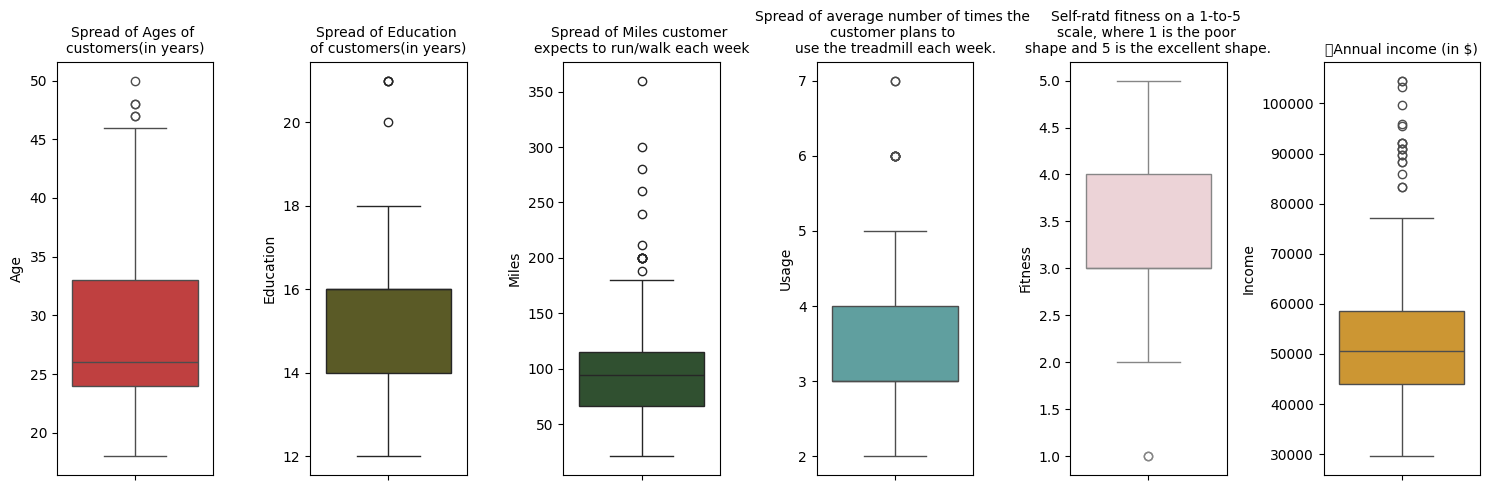

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15,5))

sns.boxplot(data = df['Age'], color = 'red', saturation = 0.5, ax = axes[0])
axes[0].set_title('Spread of Ages of \ncustomers(in years)', fontsize=10)
sns.boxplot(data = df['Education'], color = 'olive', saturation = 0.40, ax = axes[1])
axes[1].set_title('Spread of Education \nof customers(in years)', fontsize=10)
sns.boxplot(data = df['Miles'], color = 'green', saturation = 0.25, ax = axes[2])
axes[2].set_title('Spread of Miles customer \nexpects to run/walk each week', fontsize=10)
sns.boxplot(data = df['Usage'], color = 'cyan', saturation = 0.25, ax = axes[3])
axes[3].set_title('Spread of average number of times the \ncustomer plans to \nuse the treadmill each week.', fontsize=10)
sns.boxplot(data= df['Fitness'], color = 'pink', saturation = 0.40, ax = axes[4])
axes[4].set_title('Self-ratd fitness on a 1-to-5 \nscale, where 1 is the poor \nshape and 5 is the excellent shape.', fontsize=10)
sns.boxplot(data = df['Income'], color = 'orange', saturation=0.60, ax = axes[5])
axes[5].set_title('	Annual income (in $)', fontsize=10)
plt.tight_layout()
plt.show()

**Insight-** Here, we have created bocplots for all the numerical columns to find out what kind of outliers are present and how the data is spread.

**_Observations_** :
- There are very few outliers for **Education** and **Usage**.
- The same is not true for **Annual Income** and **Miles**

In [ ]:
percentiles_5 = df.quantile(0.05)
print(percentiles_5)

Age             20.00
Education       14.00
Usage            2.00
Fitness          2.00
Income       34053.15
Miles           47.00
Name: 0.05, dtype: float64


In [ ]:
percentiles_95 = df.quantile(0.95)
print(percentiles_95)

Age             43.05
Education       18.00
Usage            5.05
Fitness          5.00
Income       90948.25
Miles          200.00
Name: 0.95, dtype: float64


In [ ]:
clipped_df = df.clip(percentiles_5, percentiles_95, axis=1)

In [ ]:
clipped_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,NaN,20.00,NaN,14,NaN,3.00,4,34053.15,112
1,NaN,20.00,NaN,15,NaN,2.00,3,34053.15,75
2,NaN,20.00,NaN,14,NaN,4.00,3,34053.15,66
3,NaN,20.00,NaN,14,NaN,3.00,3,34053.15,85
4,NaN,20.00,NaN,14,NaN,4.00,2,35247.00,47
...,...,...,...,...,...,...,...,...,...
175,NaN,40.00,NaN,18,NaN,5.05,5,83416.00,200
176,NaN,42.00,NaN,18,NaN,5.00,4,89641.00,200
177,NaN,43.05,NaN,16,NaN,5.00,5,90886.00,160
178,NaN,43.05,NaN,18,NaN,4.00,5,90948.25,120


**Insight-** Here, we have tried to find out the 5th percentile and the 95th percentile of the dataset. What this does is any value below 5th percentile is set to 5th percentile and any value above 95th percentile is set to 95th percentile in the dataframe.

### 3. Check if features like marital status, age have any effect on the product purchased

[]

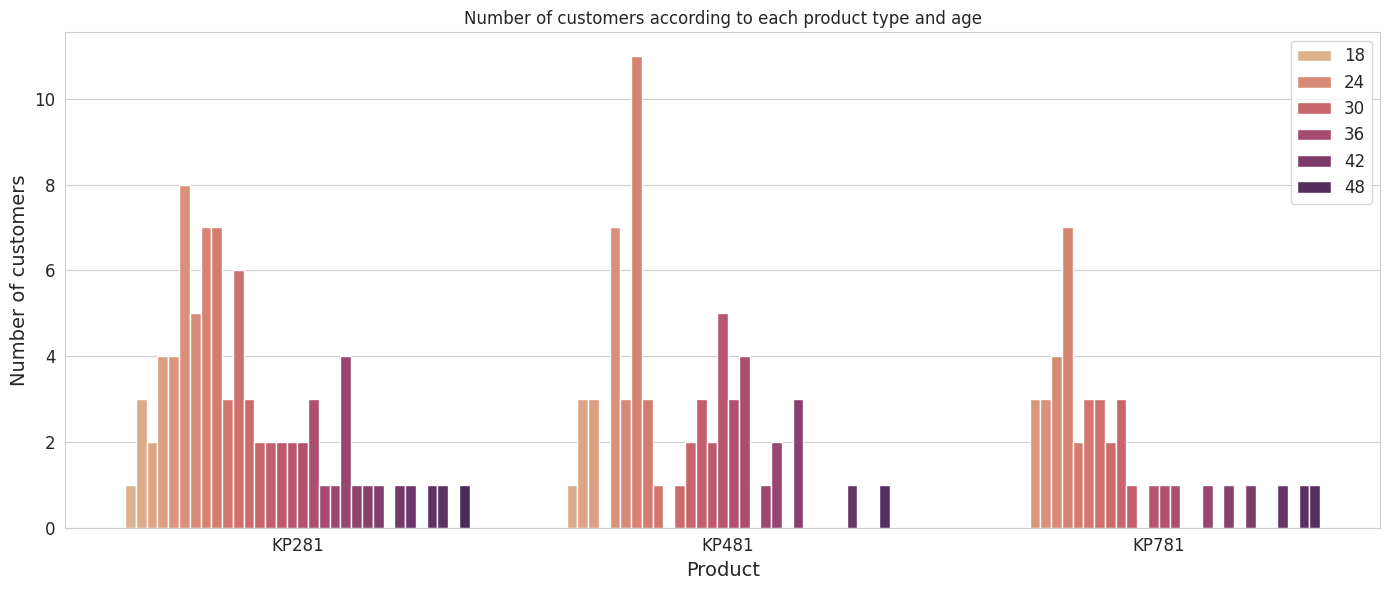

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,6))
sns.countplot(data=df, hue = 'Age', x = 'Product', palette = 'flare')
plt.title('Number of customers according to each product type and age')
plt.xlabel('Product', fontsize = 14)
plt.ylabel('Number of customers', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.plot()

**Insight-** In the above graph, we hace created a _countplot_ for the products differentiated by the age of the customers. This shows us for each **_product_** how many customers of a particular age bought that product.

**_Observations_** :
- For all the three products, there are more number of customers, in the age group 18-30 than in 30-48.
- KP281 seems to be the most frequent bought product.

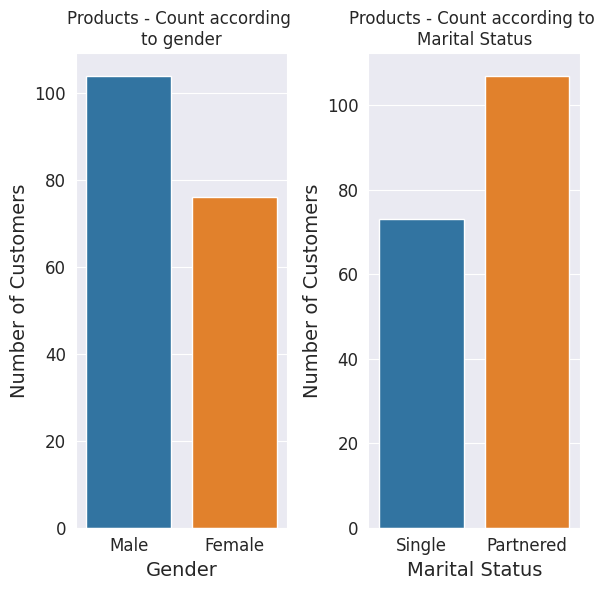

In [ ]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (6,6))
sns.countplot(data = df, x = 'Gender', hue = 'Gender', ax = axes[0])
axes[0].set_title('Products - Count according \nto gender')
axes[0].set_xlabel('Gender', fontsize=14)
axes[0].set_ylabel('Number of Customers', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
sns.countplot(data = df, x = 'MaritalStatus', hue = 'MaritalStatus', ax = axes[1])
axes[1].set_title('Products - Count according to \nMarital Status')
axes[1].set_xlabel('Marital Status', fontsize=14)
axes[1].set_ylabel('Number of Customers', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

**Insight-** This graph shows us the number of customers according to gender and marital status. We infer from this that there are more number of male customers and more number pf customers who are partnered.

**_Observations_**:
- In case of _gender_, **male customers** are more than female customers.
- In case of _marital status_ **partnered** customers are more than single customers.

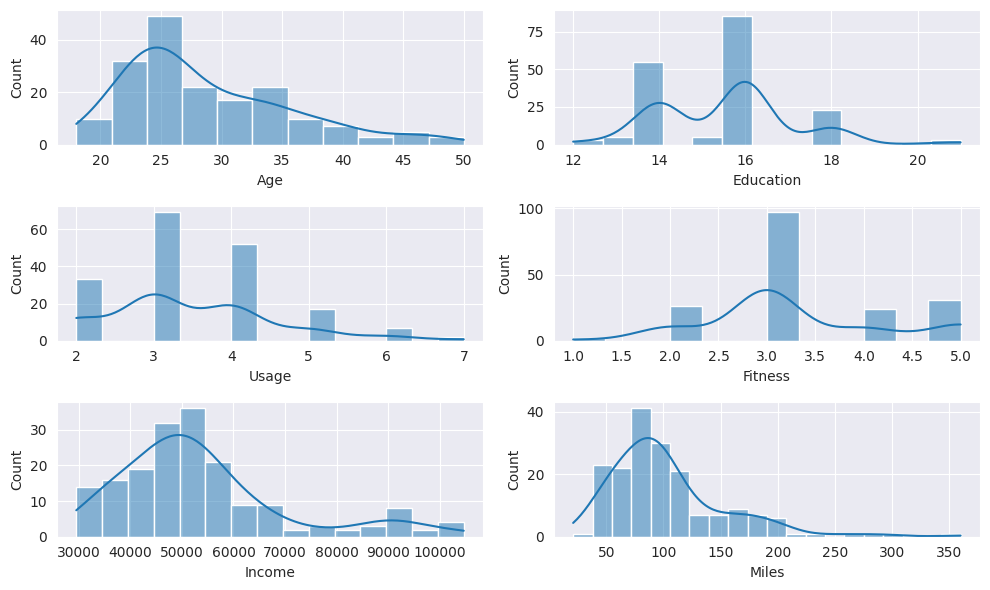

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10,6))
sns.histplot(data = df, x = 'Age', kde = True, ax = axes[0,0])
sns.histplot(data = df, x = 'Education', kde = True, ax = axes[0,1])
sns.histplot(data = df, x = 'Usage', kde = True, ax = axes[1,0])
sns.histplot(data = df, x = 'Fitness', kde = True, ax = axes[1,1])
sns.histplot(data = df, x = 'Income', kde = True, ax = axes[2,0])
sns.histplot(data = df, x = 'Miles', kde = True, ax = axes[2,1])
plt.tight_layout()
plt.show()

**Insight-** We have created 6 histogram subplots for numerical columns in order to see what the trend is across these columns and how business can make their decisions. For example in the first graph for _age_ we find that the number of customers dwindle when age increases. The same is true for income and Miles. This trend is true for all the columns.

### 4. Finding Probabilities

In order to find conditional and marginal probabilities, we use the crosstab function of pandas to give us the number of customers according to each product and single and partnered under Gender category.
<br>This helps us to categorise the products easily and give us a sense of how we can analyse further.

In [ ]:
pd.crosstab(index=df['Product'], columns=[df['Gender'], df['MaritalStatus']], margins = True, margins_name = 'Total')

Gender           Female             Male        Total
MaritalStatus Partnered Single Partnered Single      
Product                                              
KP281                27     13        21     19    80
KP481                15     14        21     10    60
KP781                 4      3        19     14    40
Total                46     30        61     43   180

- Find the marginal probability (what percent of customers have purchased
KP281, KP481, or KP781)

In [ ]:
p_KP281 = round((80/180)*100,2)
p_KP481 = round((60/180)*100,2)
p_KP781 = round((40/180)*100,2)
print(f'The Percentage of customers who bought product KP281 is: {p_KP281}%')
print(f'The Percentage of customers who bought product KP481 is: {p_KP481}%')
print(f'The Percentage of customers who bought product KP781 is: {p_KP781}%')

The Percentage of customers who bought product KP281 is: 44.44%
The Percentage of customers who bought product KP481 is: 33.33%
The Percentage of customers who bought product KP781 is: 22.22%


- Find the probability that the customer buys a product based on each column.
  - For simplicity we are only choosing Gender and MaritalStatus columns.


In [ ]:
p_male = round((21+19+21+10+19+14)/180,3)*100
p_female = round((27+13+15+14+4+3)/180,2)*100
print('The percentage of customers who are male are: ', p_male)
print('The percentage of customers who are female are: ', p_female)

The percentage of customers who are male are:  57.8
The percentage of customers who are female are:  42.0


- Find the conditional probability that an event occurs given that another event has occurred.

In [ ]:
#Given that a customer is female, what is the probabilityshe’ll purchase a KP481
probability_KP481_given_female = (15+14)/(46+30)
percentage_customers_partnered = round((46+61)/180,2)*100
probability_male_given_product_KP781 = 0.825 #This is calculated using the bayes formalua
'''
P(male/KP781) = (P(male) * P(KP781/male))/ P(KP781)

P(KP781) = 40/180
P(Male) = 104/180
P(KP781/Male) = (19+14)/(61+43)

'''
print(f'The probability that the customer uses KP481 Product given that the customer is female is {probability_KP481_given_female}')
print(f'The percentage of customers who are partnered is {percentage_customers_partnered}')
print(f'The probability that the customer is male given that he uses KP781 Product: {probability_male_given_product_KP781}')

The probability that the customer uses KP481 Product given that the customer is female is 0.3815789473684211
The percentage of customers who are partnered is 59.0
The probability that the customer is male given that he uses KP781 Product: 0.825


### 5. Check the correlation among different factors

For this we do bivariate analysis. In order to accomplish this, we use graphs like heatmaps and countplots. We also use pandas function called corr to show possilbe correlations between different columns of the dataset.

First we should find the relations between Product and Gender

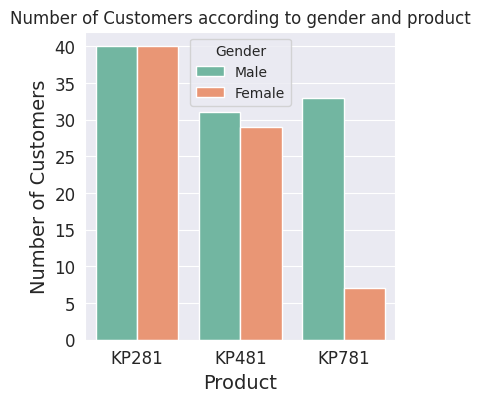

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (4,4))
sns.countplot(data=df, x = 'Product', hue = 'Gender', palette = 'Set2')
plt.title('Number of Customers according to gender and product')
plt.xlabel('Product', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Insight-** From the above figure, we find out that in case of KP281, the number of male and female customers are nearly the same. The number is slightly skewed in favour of Males in KP481 and in case of KP781 there is a vast difference with males far outclassing the females.

We can do the same for Marital Status

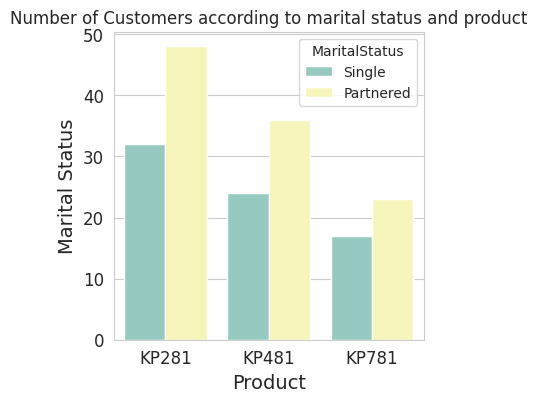

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (4,4))
sns.countplot(data=df, x = 'Product', hue = 'MaritalStatus', palette = 'Set3')
plt.title('Number of Customers according to marital status and product')
plt.xlabel('Product', fontsize=14)
plt.ylabel('Marital Status', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Insight-** When we do the same analysis for Marital Status, in all the three products, the number of customers who are **partnered is greater** than the number of customers who are single.

Now we try to do some multivariate analysis

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
glue = df.pivot_table(index='Age', columns='Product', values='Income', aggfunc='mean')

In [ ]:
glue = glue.sort_index(ascending = False)

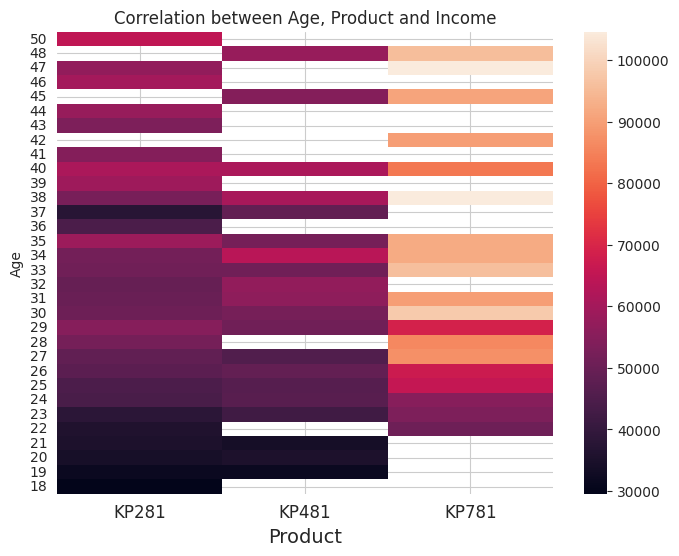

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (8,6))
sns.heatmap(glue)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 10)
plt.xlabel('Product', fontsize = 14)
plt.title('Correlation between Age, Product and Income')
plt.show()

**Insight-** In order to create a heatmap to show the relations between more than 2 variables, we first create a pivot table of the required columns and then sort the index in descending order. This show us for each age and product, what is the corresponding income of the customer. We can draw various kinds of conclusion from this.

In [ ]:
pair = df.corr(method = 'kendall', min_periods = 4)

In [ ]:
pair

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.258464,0.026296,0.049028,0.530537,0.018122
Education,0.258464,1.000000,0.326301,0.338005,0.496594,0.238748
Usage,0.026296,0.326301,1.000000,0.570850,0.284609,0.642191
Fitness,0.049028,0.338005,0.570850,1.000000,0.307114,0.701554
Income,0.530537,0.496594,0.284609,0.307114,1.000000,0.249820
Miles,0.018122,0.238748,0.642191,0.701554,0.249820,1.000000


We have used the df.corr() to find out the possible correlations between numerical columns and how each column affects the other.

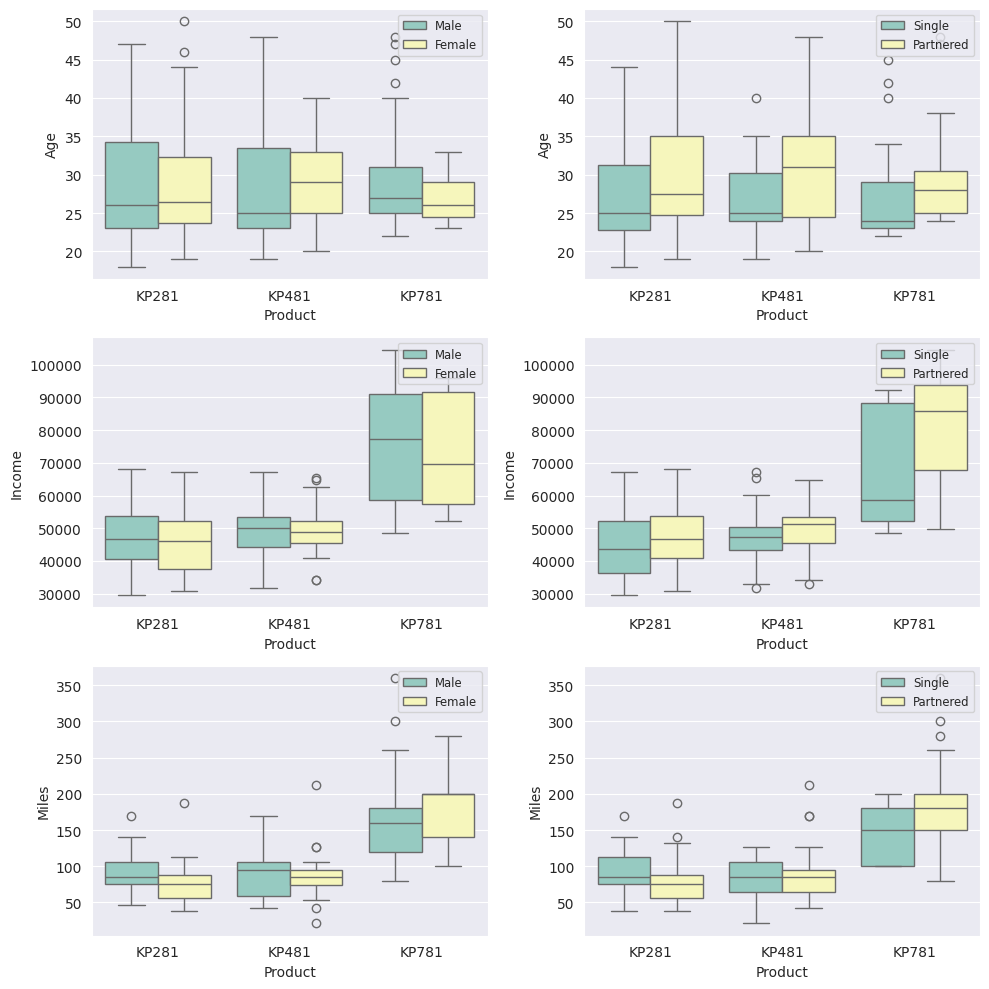

In [ ]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10))
sns.boxplot(data = df, x = 'Product', y = 'Age', hue = 'Gender', palette = 'Set3', ax = axes[0,0])
axes[0,0].legend(loc = 'upper right', fontsize = 'small')
sns.boxplot(data = df, x = 'Product', y = 'Age', hue = 'MaritalStatus', palette = 'Set3', ax = axes[0,1])
axes[0,1].legend(loc = 'upper right', fontsize = 'small')
sns.boxplot(data = df, x = 'Product', y = 'Income', hue = 'Gender', palette = 'Set3', ax = axes[1,0])
axes[1,0].legend(loc = 'upper right', fontsize = 'small')
sns.boxplot(data = df, x = 'Product', y = 'Income', hue = 'MaritalStatus', palette = 'Set3', ax = axes[1,1])
axes[1,1].legend(loc = 'upper right', fontsize = 'small')
sns.boxplot(data = df, x = 'Product', y = 'Miles', hue = 'Gender', palette = 'Set3', ax = axes[2,0])
axes[2,0].legend(loc = 'upper right', fontsize = 'small')
sns.boxplot(data = df, x = 'Product', y = 'Miles', hue = 'MaritalStatus', palette = 'Set3', ax = axes[2,1])
axes[2,1].legend(loc = 'upper right', fontsize = 'small')
plt.tight_layout()
plt.show()

**Insight-** For miles, age and income we have created box plot for each product and also differentiating the gender so that we get a sense of how each attribute is affected by the _Product_ and _marital status_ and _gender_.

### 6. Missing Values and Outliers Detection

#### Missing Values

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

#### Outliers

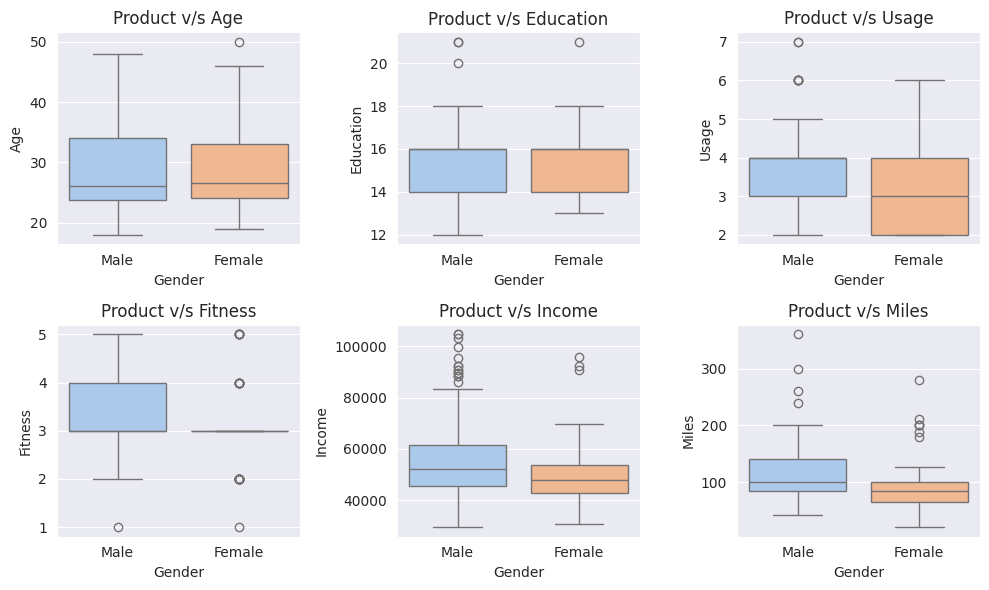

In [ ]:
columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10,6))

for i, col in enumerate(columns):
  row = i//3
  col = i%3
  sns.boxplot(data = df, x = 'Gender', y = columns[i], hue = 'Gender', palette = 'pastel', ax = axes[row,col])
  axes[row,col].set_title(f'Product v/s {columns[i]}',fontsize = 12)

plt.tight_layout()
plt.show()

**Insight-** In this segment we have tried to first find out the number of missing values. Since there are none in the dataset, we don't need to fill them with any value.
<br> In case of outliers, we use boxplot to show outliers for each numerical column and differentiated by gender to show where the outliers are.

## Inferences and Conclusion
From all the above analysis, we can draw out the following conclusions:
- There are 6 numerical columns in the dataset.
- Partnered customers buy more products than single.
- As the numerical attributes such as usage, income, miles, etc increase, the number of customers decrease.  

We can also find out the required probabilities conditional/marinal for our products using the contingency table that we earlier created:
- P(Male): 0.55
- P(Female): 0.45
- P(KP281/Male): 0.32
- P(KP481/Male): 0.30
- P(KP781/ Male): 0.38
- P(KP281/Female): 0.09
- P(KP481/Female): 0.38
- P(KP781/ Female): 0.53.

## Recommendations

- The company should try to implement policies that makes more women and singles as customers of the company.
- It should also try to target high income and older people by giving personalized products in order to increase their revenue.
- In case of females the products are skewed towards lower income and lower usage. Through better marketing and the company can also target females as well.

All the above recommendations are some of the possible ways in which Aerolift can improve its business and increase its revenue. By implementing them, Aerolift can strengthen its position in the fitness equipment industry and sustain long term growth.

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/Aerofit_Business_case.ipynb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu